# 0.準備

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy

np.random.seed(42)

# 1.コレスキー分解

スパースガウス過程回帰の計算でコレスキー分解を求める工程がある。

実数のみを成分にもつ行列に対して、コレスキー分解が可能であるとは、正定値対称行列であることである。

共分散行列は実半正定値対称行列なので少し工夫が必要である。

まずは、少し実験を行う。

実対称行列をランダムに生成して、それに対して `numpy.linalg.cholesky` を使用してコレスキー分解を試みる。

In [ ]:
def generate_symmetric_matrix(size):
    matrix = np.random.uniform(low=-1.0, high=1.0, size=(size, size))
    matrix = np.tril(matrix)
    symmetric_matrix = matrix + matrix.T - np.diag(matrix.diagonal())
    return symmetric_matrix

def sym_mat_examples(n):
    success_count = 0
    for i in range(n):
        matrix = generate_symmetric_matrix(3)
        eigenvalues = np.linalg.eigvals(matrix)
        matrix_df = pd.DataFrame(matrix)
        try:
            cholesky = np.linalg.cholesky(matrix)
            cholesky = pd.DataFrame(cholesky)
            success_count += 1
        except np.linalg.LinAlgError:
            cholesky = "失敗"

        yield eigenvalues, matrix_df, cholesky

    print(f"コレスキー分解成功回数: {success_count} / {n}")

def semi_pos_definite_sym_mat_examples(n):
    count = 0
    success_count = 0
    i = 0
    while count < n:
        matrix = generate_symmetric_matrix(3)
        eigenvalues = np.linalg.eigvals(matrix)
        if np.all(eigenvalues >= 0) and np.any(eigenvalues == 0):
            matrix_df = pd.DataFrame(matrix)
            try:
                cholesky = np.linalg.cholesky(matrix)
                cholesky = pd.DataFrame(cholesky)
                success_count += 1
            except np.linalg.LinAlgError:
                cholesky = "失敗"
            yield eigenvalues, matrix_df, cholesky
            count += 1
        i += 1
        if i > n * 10000:
            break

    print(f"コレスキー分解成功回数: {success_count} / {count}")

def pos_definite_sym_mat_examples(n):
    count = 0
    success_count = 0
    i = 0
    while count < n:
        matrix = generate_symmetric_matrix(3)
        eigenvalues = np.linalg.eigvals(matrix)
        if np.all(eigenvalues > 0):
            matrix_df = pd.DataFrame(matrix)
            try:
                cholesky = np.linalg.cholesky(matrix)
                cholesky = pd.DataFrame(cholesky)
                success_count += 1
            except np.linalg.LinAlgError:
                cholesky = "失敗"
            yield eigenvalues, matrix_df, cholesky
            count += 1
        i += 1
        if i > n * 10000:
            break

    print(f"コレスキー分解成功回数: {success_count} / {count}")

In [ ]:
generator = sym_mat_examples(10)
for eigenvalues, matrix_df, cholesky in generator:
    print(f"固有値: {eigenvalues}")
    display(matrix_df)
    if type(cholesky) == "str":
        print(f"コレスキー分解: {cholesky}\n\n")
    else:
        print("コレスキー分解:")
        display(cholesky)
        print("\n\n")

print("\n")
print("##############################################")
print("\n")

print("半正定値行列\n")
generator = semi_pos_definite_sym_mat_examples(10)
for eigenvalues, matrix_df, cholesky in generator:
    print(f"固有値: {eigenvalues}")
    display(matrix_df)
    if type(cholesky) == "str":
        print(f"コレスキー分解: {cholesky}\n\n")
    else:
        print("コレスキー分解:")
        display(cholesky)
        print("\n\n")

print("\n")
print("##############################################")
print("\n")

print("正定値行列\n")
generator = pos_definite_sym_mat_examples(10)
for eigenvalues, matrix_df, cholesky in generator:
    print(f"固有値: {eigenvalues}")
    display(matrix_df)
    if type(cholesky) == "str":
        print(f"コレスキー分解: {cholesky}\n\n")
    else:
        print("コレスキー分解:")
        display(cholesky)
        print("\n\n")

固有値: [ 1.13848248  0.14328037 -1.25591537]


,0,1,2
0,0.777949,-0.183088,0.597468
1,-0.183088,0.030596,-0.668678
2,0.597468,-0.668678,-0.782698


コレスキー分解:


'失敗'




固有値: [ 1.17685429 -1.26070302 -0.66973313]


,0,1,2
0,-0.152665,-0.578865,0.931463
1,-0.578865,-0.886288,-0.252223
2,0.931463,-0.252223,0.285371


コレスキー分解:


'失敗'




固有値: [ 0.79310931 -0.52107246 -1.22569553]


,0,1,2
0,-0.231615,-0.668223,-0.016157
1,-0.668223,0.141740,0.587130
2,-0.016157,0.587130,-0.863783


コレスキー分解:


'失敗'




固有値: [-1.33597136  1.15226201  0.21455816]


,0,1,2
0,0.509516,0.727452,0.136246
1,0.727452,-0.011815,-0.890328
2,0.136246,-0.890328,-0.466852


コレスキー分解:


'失敗'




固有値: [ 1.49007739 -0.6456333  -1.21591795]


,0,1,2
0,-0.397594,0.838485,-0.170885
1,0.838485,0.633090,-0.928390
2,-0.170885,-0.928390,-0.606970


コレスキー分解:


'失敗'




固有値: [ 1.51625887 -1.13610251 -0.73360145]


,0,1,2
0,-0.793568,-0.726250,0.393778
1,-0.726250,0.436734,-0.985506
2,0.393778,-0.985506,0.003389


コレスキー分解:


'失敗'




固有値: [ 0.85883051 -1.55312623 -1.18127689]


,0,1,2
0,-0.820465,0.952754,0.537484
1,0.952754,-0.062188,0.494484
2,0.537484,0.494484,-0.992919


コレスキー分解:


'失敗'




固有値: [ 1.40070851 -0.15187181  0.22006336]


,0,1,2
0,0.830806,0.721372,-0.161643
1,0.721372,0.378918,-0.140493
2,-0.161643,-0.140493,0.259176


コレスキー分解:


'失敗'




固有値: [ 1.09183576 -1.1606186  -0.40246977]


,0,1,2
0,-0.608930,-0.903445,-0.021997
1,-0.903445,0.527711,-0.364916
2,-0.021997,-0.364916,-0.390033


コレスキー分解:


'失敗'




固有値: [ 1.12468982 -0.78024599 -0.4927756 ]


,0,1,2
0,-0.328077,0.339901,-0.730762
1,0.339901,-0.341728,-0.400687
2,-0.730762,-0.400687,0.521473


コレスキー分解:


'失敗'




コレスキー分解成功回数: 0 / 10


##############################################


半正定値行列

コレスキー分解成功回数: 0 / 0


##############################################


正定値行列

固有値: [0.01781841 1.34791225 1.05326403]


,0,1,2
0,0.636703,-0.571799,-0.321987
1,-0.571799,0.871002,-0.188156
2,-0.321987,-0.188156,0.911289


コレスキー分解:


,0,1,2
0,0.797937,0.000000,0.000000
1,-0.716597,0.597905,0.000000
2,-0.403525,-0.798322,0.333375





固有値: [1.19829556 0.20973781 0.46310762]


,0,1,2
0,0.644382,0.251430,-0.418352
1,0.251430,0.503063,-0.113719
2,-0.418352,-0.113719,0.723696


コレスキー分解:


,0,1,2
0,0.802734,0.000000,0.000000
1,0.313216,0.636364,0.000000
2,-0.521159,0.077812,0.667858





固有値: [1.64138853 0.07363949 0.27654945]


,0,1,2
0,0.107424,-0.148310,0.170412
1,-0.148310,0.915187,-0.665576
2,0.170412,-0.665576,0.968966


コレスキー分解:


,0,1,2
0,0.327756,0.000000,0.000000
1,-0.452503,0.842869,0.000000
2,0.519936,-0.510522,0.661816





固有値: [1.40329269 0.06523069 0.49944825]


,0,1,2
0,0.962990,-0.500085,0.313260
1,-0.500085,0.717222,0.031123
2,0.313260,0.031123,0.287759


コレスキー分解:


,0,1,2
0,0.981321,0.000000,0.000000
1,-0.509604,0.676407,0.000000
2,0.319223,0.286514,0.322127





固有値: [0.97169285 0.71400452 0.12953754]


,0,1,2
0,0.761859,0.010067,0.145637
1,0.010067,0.516462,0.382562
2,0.145637,0.382562,0.536914


コレスキー分解:


,0,1,2
0,0.872845,0.000000,0.000000
1,0.011533,0.718561,0.000000
2,0.166853,0.529723,0.477983





固有値: [1.24701455 0.13495147 0.36030917]


,0,1,2
0,0.540999,0.404055,-0.348999
1,0.404055,0.668878,-0.233915
2,-0.348999,-0.233915,0.532398


コレスキー分解:


,0,1,2
0,0.735526,0.000000,0.000000
1,0.549341,0.605890,0.000000
2,-0.474489,0.044136,0.552548





固有値: [0.08584542 0.86192132 1.34929122]


,0,1,2
0,0.686969,0.455951,0.027289
1,0.455951,0.636403,-0.405335
2,0.027289,-0.405335,0.973686


コレスキー分解:


,0,1,2
0,0.828836,0.000000,0.00000
1,0.550110,0.577738,0.00000
2,0.032925,-0.732939,0.65985





固有値: [0.90514458 0.31873541 0.14184238]


,0,1,2
0,0.373739,0.218619,0.036601
1,0.218619,0.805342,-0.099093
2,0.036601,-0.099093,0.186641


コレスキー分解:


,0,1,2
0,0.611342,0.000000,0.000000
1,0.357605,0.823080,0.000000
2,0.059870,-0.146405,0.402023





固有値: [0.0520354  0.7866479  0.98620587]


,0,1,2
0,0.070623,-0.103751,-0.062080
1,-0.103751,0.951802,-0.070799
2,-0.062080,-0.070799,0.802464


コレスキー分解:


,0,1,2
0,0.265750,0.000000,0.000000
1,-0.390407,0.894083,0.000000
2,-0.233603,-0.181191,0.845614





固有値: [1.47794392 0.02288992 0.66080075]


,0,1,2
0,0.465107,-0.525192,-0.106172
1,-0.525192,0.750750,0.431773
2,-0.106172,0.431773,0.945778


コレスキー分解:


,0,1,2
0,0.681988,0.000000,0.000000
1,-0.770091,0.397128,0.000000
2,-0.155680,0.785354,0.552052





コレスキー分解成功回数: 10 / 10


正定値行列でないとき、コレスキー分解が成功していないことが確認された。

加えて、対角行列でない少なくとも１つの固有値が０になる対称行列をランダムに生成するというのは現実的ではないようである。

In [ ]:
mat = np.diag([1, 2, 0]).astype(float)
pd.DataFrame(mat)

,0,1,2
0,1.0,0.0,0.0
1,0.0,2.0,0.0
2,0.0,0.0,0.0


In [ ]:
np.linalg.cholesky(mat)

LinAlgError: ignored

やはり、半正定値実対称行列はコレスキー分解できないことが確認された。

ここで、行列の対角成分に小さい値を加えるという操作をする。

In [ ]:
def jitter(n, jitter_value):
    return np.eye(n) * jitter_value

def cholesky_decomposition(matrix, jitter_value):
    while True:
        try:
            L = np.linalg.cholesky(matrix)
            return L
        except np.linalg.LinAlgError:
            matrix += jitter(len(matrix), jitter_value)

In [ ]:
L = cholesky_decomposition(mat, 1e-6)
pd.DataFrame(L)

,0,1,2
0,1.0,0.000000,0.000
1,0.0,1.414214,0.000
2,0.0,0.000000,0.001


In [ ]:
pd.DataFrame(L @ L.T)

,0,1,2
0,1.000001,0.000000,0.000000
1,0.000000,2.000001,0.000000
2,0.000000,0.000000,0.000001


In [ ]:
def generate_symmetric_matrix(size):
    matrix = np.random.uniform(low=-1.0, high=1.0, size=(size, size))
    matrix = np.tril(matrix)
    symmetric_matrix = matrix + matrix.T - np.diag(matrix.diagonal())
    return symmetric_matrix

def sym_mat_examples(n):
    success_count = 0
    for i in range(n):
        matrix = generate_symmetric_matrix(3)
        eigenvalues = np.linalg.eigvals(matrix)
        matrix_df = pd.DataFrame(matrix)

        max_abs_mat = max(abs(matrix.max()), abs(matrix.min()))

        try:
            cholesky = cholesky_decomposition(matrix, 1e-6)
            LLT = cholesky @ cholesky.T
            diff = abs(matrix - LLT)

            max_abs_chol = max(abs(cholesky.max()), abs(cholesky.min()))
            max_abs_LLT = max(abs(LLT.max()), abs(LLT.min()))
            max_abs_diff = max(abs(diff.max()), abs(diff.min()))

            cholesky = pd.DataFrame(cholesky)
            LLT = pd.DataFrame(LLT)
            diff = pd.DataFrame(diff)
            success_count += 1

            plt.figure(figsize=(16,3))

            plt.subplot(141)
            plt.title("original")
            sns.heatmap(matrix,
                        annot=True,
                        vmin=-1*max_abs_mat,
                        vmax=max_abs_mat,
                        cmap=sns.diverging_palette(20, 220, n=100))

            plt.subplot(142)
            plt.title("L")
            sns.heatmap(cholesky,
                        annot=True,
                        vmin=-1*max_abs_chol,
                        vmax=max_abs_chol,
                        cmap=sns.diverging_palette(20, 220, n=100))

            plt.subplot(143)
            plt.title("L @ L.T")
            sns.heatmap(LLT,
                        annot=True,
                        vmin=-1*max_abs_LLT,
                        vmax=max_abs_LLT,
                        cmap=sns.diverging_palette(20, 220, n=100))

            plt.subplot(144)
            plt.title("difference")
            sns.heatmap(diff,
                        annot=True,
                        # vmin=-1*max_abs_diff,
                        # vmax=max_abs_diff,
                        vmin=-1,
                        vmax=1,
                        cmap=sns.diverging_palette(20, 220, n=100))

        except np.linalg.LinAlgError:
            cholesky = "失敗"
            LLT = "失敗"
            diff = "失敗"

        yield eigenvalues, matrix_df, cholesky, LLT, diff

    print(f"コレスキー分解成功回数: {success_count} / {n}")

固有値: [-1.10087715  0.54912772  0.98843356]


,0,1,2
0,0.842581,-0.675243,0.644753
1,-0.675243,1.721928,0.380308
2,0.644753,0.380308,1.174809


コレスキー分解:


,0,1,2
0,0.917922,0.000000,0.000000
1,-0.735621,1.086642,0.000000
2,0.702405,0.825490,0.001721


L @ L.T:


,0,1,2
0,0.842581,-0.675243,0.644753
1,-0.675243,1.721928,0.380308
2,0.644753,0.380308,1.174809


元の行列と復元した行列の差分の絶対値


,0,1,2
0,1.110223e-16,0.0,1.110223e-16
1,0.000000e+00,0.0,0.000000e+00
2,1.110223e-16,0.0,0.000000e+00


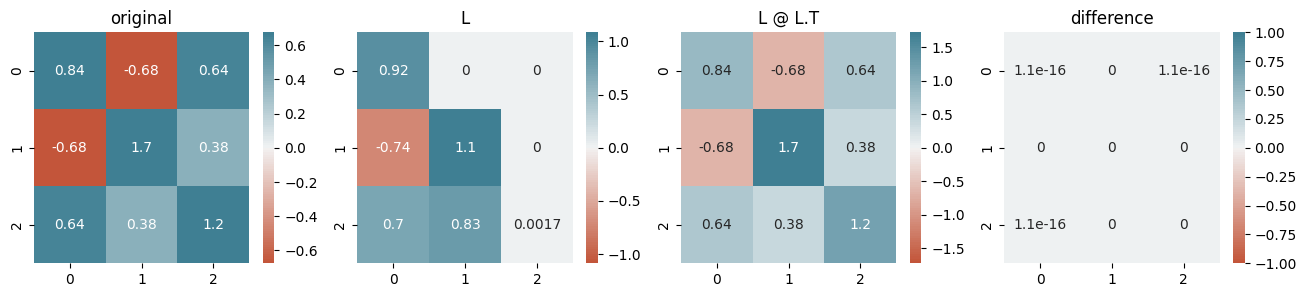




固有値: [-0.78752577  1.38234937  0.82558229]


,0,1,2
0,1.233548,-0.743235,0.732771
1,-0.743235,1.046802,0.358070
2,0.732771,0.358070,1.502634


コレスキー分解:


,0,1,2
0,1.110652,0.000000,0.000000
1,-0.669188,0.773944,0.000000
2,0.659767,1.033122,0.001039


L @ L.T:


,0,1,2
0,1.233548,-0.743235,0.732771
1,-0.743235,1.046802,0.358070
2,0.732771,0.358070,1.502634


元の行列と復元した行列の差分の絶対値


,0,1,2
0,0.0,0.000000e+00,0.000000e+00
1,0.0,2.220446e-16,5.551115e-17
2,0.0,5.551115e-17,0.000000e+00


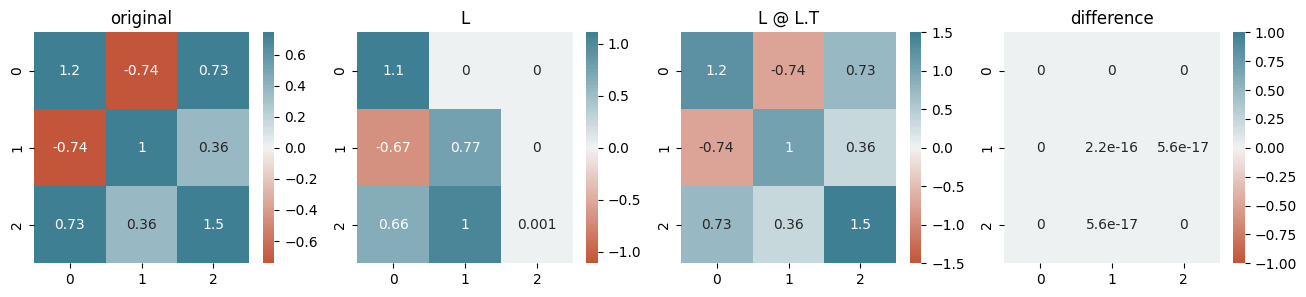




固有値: [ 1.20711514 -0.71662603 -0.27612677]


,0,1,2
0,0.411830,-0.152944,-0.679776
1,-0.152944,0.662971,0.570988
2,-0.679776,0.570988,1.289442


コレスキー分解:


,0,1,2
0,0.641740,0.00000,0.000000
1,-0.238326,0.77857,0.000000
2,-1.059269,0.40913,0.001818


L @ L.T:


,0,1,2
0,0.411830,-0.152944,-0.679776
1,-0.152944,0.662971,0.570988
2,-0.679776,0.570988,1.289442


元の行列と復元した行列の差分の絶対値


,0,1,2
0,5.551115e-17,0.0,0.0
1,0.000000e+00,0.0,0.0
2,0.000000e+00,0.0,0.0


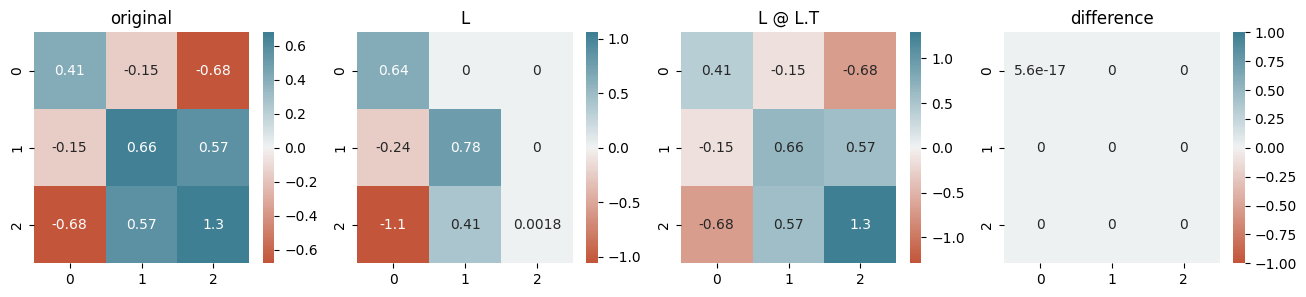




固有値: [ 0.92922659 -0.42705085 -1.60773177]


,0,1,2
0,1.305167,-0.891002,0.136667
1,-0.891002,1.083135,-0.883533
2,0.136667,-0.883533,1.329338


コレスキー分解:


,0,1,2
0,1.142439,0.000000,0.000000
1,-0.779912,0.689110,0.000000
2,0.119628,-1.146746,0.001061


L @ L.T:


,0,1,2
0,1.305167,-0.891002,0.136667
1,-0.891002,1.083135,-0.883533
2,0.136667,-0.883533,1.329338


元の行列と復元した行列の差分の絶対値


,0,1,2
0,2.220446e-16,0.0,0.0
1,0.000000e+00,0.0,0.0
2,0.000000e+00,0.0,0.0


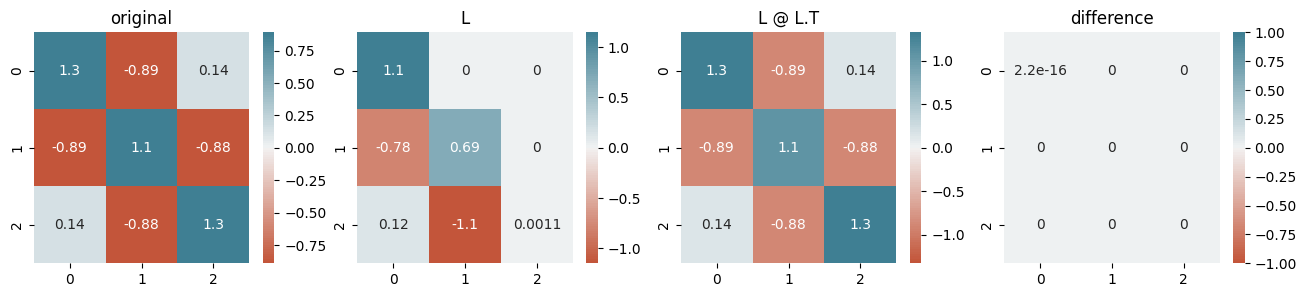




固有値: [ 1.77602553 -0.96013076 -0.26873796]


,0,1,2
0,0.677276,-0.539156,0.735505
1,-0.539156,1.895850,-0.871284
2,0.735505,-0.871284,0.854423


コレスキー分解:


,0,1,2
0,0.822968,0.000000,0.00000
1,-0.655136,1.211052,0.00000
2,0.893723,-0.235972,0.00067


L @ L.T:


,0,1,2
0,0.677276,-0.539156,0.735505
1,-0.539156,1.895850,-0.871284
2,0.735505,-0.871284,0.854423


元の行列と復元した行列の差分の絶対値


,0,1,2
0,0.0,0.000000e+00,0.0
1,0.0,2.220446e-16,0.0
2,0.0,0.000000e+00,0.0


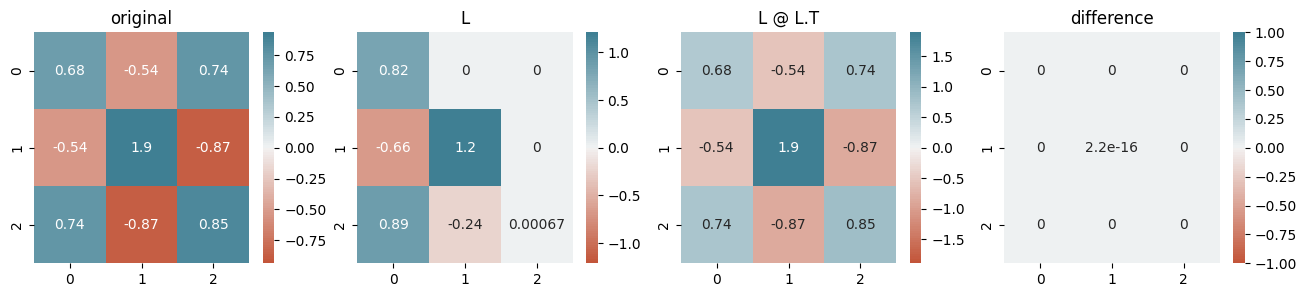




固有値: [ 0.35785361 -0.70891073 -0.97678087]


,0,1,2
0,0.813044,-0.449409,0.287508
1,-0.449409,0.543110,-0.365409
2,0.287508,-0.365409,0.246351


コレスキー分解:


,0,1,2
0,0.901690,0.000000,0.000000
1,-0.498407,0.542863,0.000000
2,0.318855,-0.380371,0.000447


L @ L.T:


,0,1,2
0,0.813044,-0.449409,0.287508
1,-0.449409,0.543110,-0.365409
2,0.287508,-0.365409,0.246351


元の行列と復元した行列の差分の絶対値


,0,1,2
0,1.110223e-16,5.551115e-17,0.0
1,5.551115e-17,0.000000e+00,0.0
2,0.000000e+00,0.000000e+00,0.0


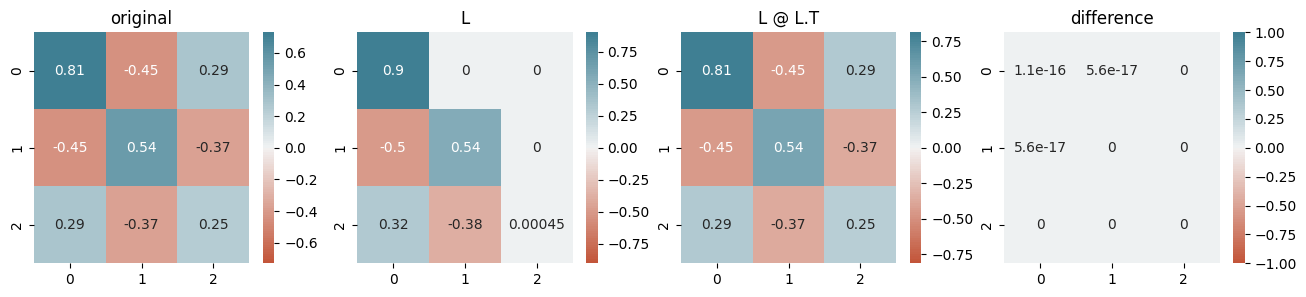




固有値: [ 0.549167   -0.73280035 -1.00612823]


,0,1,2
0,0.691296,0.054644,-0.672099
1,0.054644,0.183259,-0.285064
2,-0.672099,-0.285064,0.954070


コレスキー分解:


,0,1,2
0,0.831442,0.000000,0.000000
1,0.065722,0.423013,0.000000
2,-0.808354,-0.548299,0.001629


L @ L.T:


,0,1,2
0,0.691296,0.054644,-0.672099
1,0.054644,0.183259,-0.285064
2,-0.672099,-0.285064,0.954070


元の行列と復元した行列の差分の絶対値


,0,1,2
0,1.110223e-16,6.938894e-18,0.0
1,6.938894e-18,2.775558e-17,0.0
2,0.000000e+00,0.000000e+00,0.0


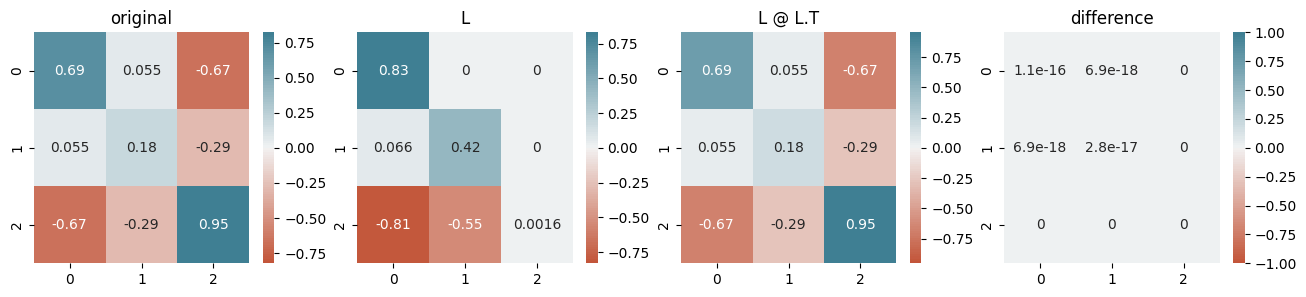




固有値: [ 1.50249512 -0.86897253  0.02779317]


,0,1,2
0,1.684884,-0.719311,-0.742095
1,-0.719311,0.479735,-0.049389
2,-0.742095,-0.049389,1.103616


コレスキー分解:


,0,1,2
0,1.298031,0.000000,0.000000
1,-0.554156,0.415508,0.000000
2,-0.571708,-0.881341,0.001862


L @ L.T:


,0,1,2
0,1.684884,-0.719311,-0.742095
1,-0.719311,0.479735,-0.049389
2,-0.742095,-0.049389,1.103616


元の行列と復元した行列の差分の絶対値


,0,1,2
0,0.0,0.000000e+00,0.000000e+00
1,0.0,0.000000e+00,2.775558e-17
2,0.0,2.775558e-17,2.220446e-16


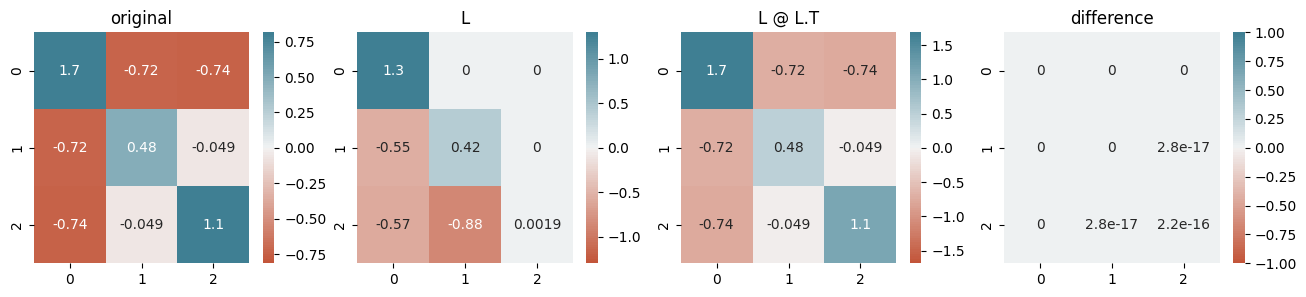




固有値: [ 2.38611716 -0.04729533  0.29623509]


,0,1,2
0,0.897053,-0.876294,-0.763922
1,-0.876294,0.907464,0.617562
2,-0.763922,0.617562,0.972428


コレスキー分解:


,0,1,2
0,0.947129,0.000000,0.000000
1,-0.925212,0.226821,0.000000
2,-0.806566,-0.567333,0.003471


L @ L.T:


,0,1,2
0,0.897053,-0.876294,-0.763922
1,-0.876294,0.907464,0.617562
2,-0.763922,0.617562,0.972428


元の行列と復元した行列の差分の絶対値


,0,1,2
0,1.110223e-16,0.0,1.110223e-16
1,0.000000e+00,0.0,0.000000e+00
2,1.110223e-16,0.0,0.000000e+00


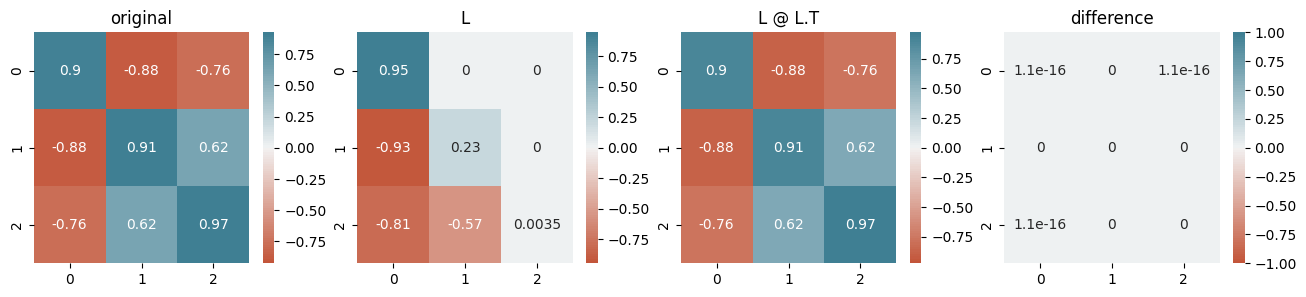




固有値: [-1.87486575  0.64964194 -0.53497087]


,0,1,2
0,0.957330,0.829997,0.900738
1,0.829997,1.453580,0.114004
2,0.900738,0.114004,1.453494


コレスキー分解:


,0,1,2
0,0.978432,0.000000,0.000000
1,0.848292,0.856726,0.000000
2,0.920593,-0.778461,0.001106


L @ L.T:


,0,1,2
0,0.957330,0.829997,0.900738
1,0.829997,1.453580,0.114004
2,0.900738,0.114004,1.453494


元の行列と復元した行列の差分の絶対値


,0,1,2
0,0.000000e+00,0.000000e+00,1.110223e-16
1,0.000000e+00,0.000000e+00,1.387779e-17
2,1.110223e-16,1.387779e-17,0.000000e+00


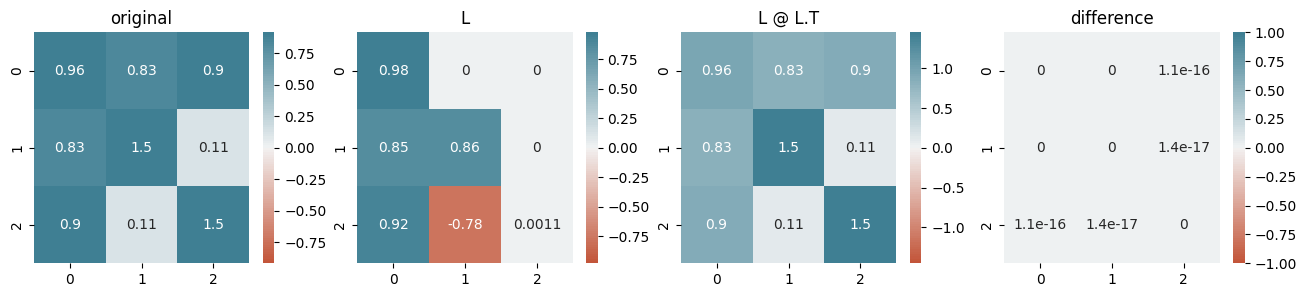




コレスキー分解成功回数: 10 / 10


In [ ]:
generator = sym_mat_examples(10)
for eigenvalues, matrix_df, cholesky, LLT, diff in generator:
    print(f"固有値: {eigenvalues}")
    display(matrix_df)
    if type(cholesky) == "str":
        print(f"コレスキー分解: {cholesky}\n\n")
    else:
        print("コレスキー分解:")
        display(cholesky)
        print("L @ L.T:")
        display(LLT)
        print("元の行列と復元した行列の差分の絶対値")
        display(diff)
        plt.show()
        print("\n\n")

このようにして対角成分にごく小さい値を足すことによって、半正定値ですらない実対称行列でさえ安定的にコレスキー分解できること確認できる。

ただし、こういった計算を一連のプログラムの一部に組み込んで、一貫して十分な精度を保てるかはわからない。



# 2. スパースガウス過程回帰実装

In [2]:
class GPR:
    def __init__(self, X, y, params, jitter_value=1e-6):
        self.X = X.astype(float)
        self.y = y.astype(float)
        self.X_pred = None
        self.kernel_func = self._rbf_kernel
        self.initial_params = params
        self.params = params
        self.jitter_value = jitter_value
        self.N = len(X)
        self.K = None
        self.K_inv = None
        self.mean_pred = None
        self.var_pred = None

    def _jitter(self, n):
        return np.eye(n) * self.jitter_value

    def _cholesky_decomposition(self, matrix):
        while True:
            try:
                L = np.linalg.cholesky(matrix)
                return L
            except np.linalg.LinAlgError:
                matrix += self._jitter(len(matrix))

    def _inverse_matrix(self, matrix):
        try:
            matrix_inv = np.linalg.inv(matrix)
            return matrix_inv
        except:
            matrix += self._jitter(matrix.shape[0])
            matrix_inv = np.linalg.inv(matrix)
            return matrix_inv

    def _log(self, x):
        x += self.jitter_value
        return np.log(x)

    def _determinant(self, matrix):
        matrix += self._jitter(matrix.shape[0])
        return np.linalg.det(matrix)

    def _rbf_kernel(self, x1, x2, theta1, theta2):
        return theta1 * np.exp(- (x1 - x2)**2 / theta2)

    def _compute_kernel_matrix(self, x1, x2, params):
        tmp1, tmp2 = x1, x2
        n1, n2 = len(x1), len(x2)
        x1, x2 = x1.reshape(n1,1), x2.reshape(1,n2)
        x1, x2 = np.tile(x1, (1, n2)), np.tile(x2, (n1, 1))
        K = self.kernel_func(x1, x2, params[0], params[1])
        if np.array_equal(tmp1, tmp2):
            K += params[2] * np.eye(n1)
        return K

    def fit(self):
        self.K = self._compute_kernel_matrix(self.X, self.X, self.params)
        self.K_noise = self.K + self.params[2] * np.eye(self.K.shape[0])
        self.K_noise_inv = self._inverse_matrix(self.K_noise)

    def predict(self, X_pred):
        self.X_pred = X_pred.astype(float)

        K_star_n = self._compute_kernel_matrix(X_pred, self.X, self.params)
        self.mean_pred = K_star_n @ self.K_noise_inv @ self.y
        K_star_star = self._compute_kernel_matrix(X_pred, X_pred, self.params)
        cov_pred = K_star_star - K_star_n @ self.K_noise_inv @ K_star_n.T
        self.var_pred = np.diag(cov_pred)

    def _objective_func(self, params):
        K = self._compute_kernel_matrix(self.X, self.X, params)
        K_noise = K + params[2] * np.eye(K.shape[0])
        K_noise_inv = self._inverse_matrix(K_noise)
        K_noise_det = self._determinant(K_noise)
        func = self._log(K_noise_det) + self.y.T @ K_noise_inv @ self.y
        return func

    def optimize(self):
        bounds = [(1e-6, None), (1e-6, None), (1e-6, None)]
        initial_values = self.params
        result = scipy.optimize.minimize(self._objective_func,
                                         initial_values,
                                         method='L-BFGS-B')
        self.params = list(result.x)
        self.fit()
        print(result)

In [3]:
class SparseGPR(GPR):
    def __init__(self, X, y, Z, params, jitter_value=1e-6):
        super().__init__(X, y, params, jitter_value)

        self.Z = Z.astype(float)

        self.params_for_opt = params + list(Z.astype(float))

        self.L = None
        self.L_inv = None
        self.A = None
        self.B = None
        self.B_inv = None
        self.L_B = None
        self.L_B_inv = None
        self.c = None

    def _compute_kernel_matrix_diag(self, x, params):
        n = len(x)
        K_diag = np.zeros((n,n))

        for i in range(n):
            K_diag[i,i] = self.kernel_func(x[i], x[i], params[0], params[1])

        return K_diag

    def fit(self):
        K_mm = self._compute_kernel_matrix(self.Z, self.Z, self.params)
        K_mn = self._compute_kernel_matrix(self.Z, self.X, self.params)
        sigma = self.params[2] ** (1/2)

        self.test = pd.DataFrame(K_mn @ K_mn.T)

        self.L = self._cholesky_decomposition(K_mm)
        self.L_inv = self._inverse_matrix(self.L)
        self.A = self.L_inv @ K_mn * (sigma ** -1)
        self.B = np.eye(self.A.shape[0]) + self.A @ self.A.T
        self.B_inv = self._inverse_matrix(self.B)
        self.L_B = self._cholesky_decomposition(self.B)
        self.L_B_inv = self._inverse_matrix(self.L_B)
        self.c = self.L_B_inv @ self.A @ self.y * (sigma ** -1)

    def predict(self, X_pred):
        self.X_pred = X_pred.astype(float)

        K_star_m = self._compute_kernel_matrix(X_pred, self.Z, self.params)
        K_star = self._compute_kernel_matrix_diag(X_pred, self.params)

        self.mean_pred = K_star_m @ self.L_inv.T @ self.L_B_inv.T @ self.c
        self.var_pred = np.diag(K_star) \
                        - np.diag(K_star_m @ self.L_inv @ (np.eye(self.B.shape[0]) \
                        - self.B_inv) @ self.L_inv @ K_star_m.T) \
                        + self.params[2]

    def _objective_func(self, params_for_opt):
        params = params_for_opt[0:len(self.params)]
        Z = np.array(params_for_opt[len(self.params):])
        sigma = params[2] ** (1/2)

        K_nn_diag = self._compute_kernel_matrix_diag(self.X, params)
        K_mm = self._compute_kernel_matrix(Z, Z, params)
        K_mn = self._compute_kernel_matrix(Z, self.X, params)
        L = self._cholesky_decomposition(K_mm)
        L_inv = self._inverse_matrix(L)
        A = L_inv @ K_mn * (sigma ** -1)
        B = np.eye(A.shape[0]) + A @ A.T
        B_inv = self._inverse_matrix(B)
        L_B = self._cholesky_decomposition(B)
        L_B_inv = self._inverse_matrix(L_B)
        c = L_B_inv @ A @ self.y * (sigma ** -1)

        elbo = - self.X.shape[0]/2 * self._log(2 * np.pi) \
               - 1/2 * self._log(np.linalg.det(B)) \
               - self.X.shape[0]/2 * self._log(params[2]) \
               - 1/2 * c.T @ c \
               - 1/2 * (params[2] ** -1) * np.trace(K_nn_diag) \
               + 1/2 * np.trace(A @ A.T)

        return - float(elbo)

    def _objective_func2(self, params_for_opt):
        params = params_for_opt[0:len(self.params)]
        Z = np.array(params_for_opt[len(self.params):])

        K_mm = self._compute_kernel_matrix(Z, Z, params_for_opt[0:len(self.params)])
        K_mm_inv = self._inverse_matrix(K_mm)
        K_mn = self._compute_kernel_matrix(Z, self.X, params)
        cov = K_mn.T @ K_mm_inv @ K_mn + params[2] * np.eye(self.N)
        cov_det = self._determinant(cov)
        cov_inv = self._inverse_matrix(cov)
        K_nn_diag = self._compute_kernel_matrix_diag(self.X, params)

        Lambda_tr = 0
        for i in range(self.N):
            Lambda_tr += K_nn_diag[i,i] - K_mn[:,i].T @ K_mm_inv @ K_mn[:,i]

        func = self._log(cov_det) + self.y.T @ cov_inv @ self.y + params[2]**(-1) * Lambda_tr
        return func


    def _objective_func3(self, params_for_opt):
        params = params_for_opt[0:len(self.params)]
        Z = np.array(params_for_opt[len(self.params):])
        K_mm = self._compute_kernel_matrix(Z, Z, params_for_opt[0:len(self.params)])
        K_mm_inv = self._inverse_matrix(K_mm)
        K_mn = self._compute_kernel_matrix(Z, self.X, params)
        K_nn_diag = self._compute_kernel_matrix_diag(self.X, params)

        Lambda = np.zeros((self.N, self.N))
        for i in range(self.N):
            Lambda[i,i] = K_nn_diag[i,i] - K_mn[:,i].T @ K_mm_inv @ K_mn[:,i]

        K = K_mn.T @ K_mm_inv @ K_mn + Lambda + params[2] * np.eye(self.N)
        K_inv = self._inverse_matrix(K)
        func = self._log(np.linalg.det(K)) + self.y.T @ K_inv @ self.y
        return func

    def set_objective_func(self, func_name):
        if func_name == 'func1':
            self.objective_func = self._objective_func
        elif func_name == 'func2':
            self.objective_func = self._objective_func2
        elif func_name == 'func3':
            self.objective_func = self._objective_func3
        else:
            raise ValueError(f"Invalid function name: {func_name}")

    def optimize(self):
        bounds = [(1e-20, None), (1e-20, None), (1e-20, None)]
        for i in range(len(self.Z)):
            bounds.append((self.X.min() - 1, self.X.max() + 1))

        initial_values = self.params_for_opt
        result = scipy.optimize.minimize(self.objective_func,
                                         initial_values,
                                         method='L-BFGS-B',
                                         bounds=bounds)

        self.params = list(result.x)[0:len(self.params)]
        self.Z = np.array(list(result.x)[len(self.params):])

        self.fit()
        print(result)

In [ ]:
!pip install pods
import pods

In [39]:
data = pods.datasets.olympic_100m_men()
X, Y = data["X"], data["Y"]
X_pred = np.linspace(X[:,0].min() - 30,
                     X[:,0].max() + 30,
                     500)
X, y = X[:,0], Y[:,0]
X, y

(array([1896., 1900., 1904., 1906., 1908., 1912., 1920., 1924., 1928.,
        1932., 1936., 1948., 1952., 1956., 1960., 1964., 1968., 1972.,
        1976., 1980., 1984., 1988., 1992., 1996., 2000., 2004., 2008.]),
 array([12.  , 11.  , 11.  , 11.2 , 10.8 , 10.8 , 10.8 , 10.6 , 10.8 ,
        10.3 , 10.3 , 10.3 , 10.4 , 10.5 , 10.2 , 10.  ,  9.95, 10.14,
        10.06, 10.25,  9.99,  9.92,  9.96,  9.84,  9.87,  9.85,  9.69]))

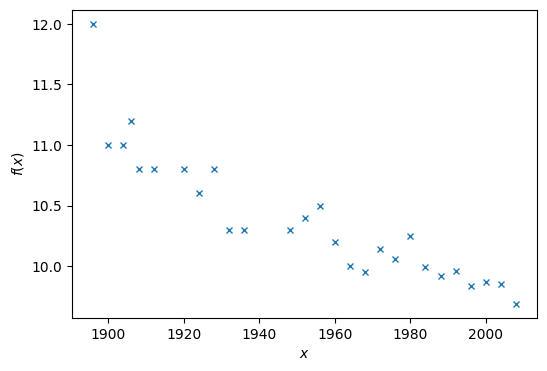

In [40]:
params_kern = [5, 5]
noise = [0.3]
params = params_kern + noise

plt.figure(figsize=(6,4))
plt.plot(X, y, 'x', color='#1f77b4', markersize=5)
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.show()

In [43]:
def visualise(model, title=""):
    plt.figure(figsize=(8, 5))
    plt.title(title)
    plt.xlabel(r"$X$")
    plt.ylabel(r"$y, f(X)$")
    # plt.ylim(-(max(model.y)+5), max(model.y)+5)
    plt.plot(model.X, model.y, "x", color="#1f77b4", markersize=5, label="Data")
    # plt.plot(model.X_pred,
    #          np.cos(3*model.X_pred)+np.sin(2*model.X_pred),
    #          color="#1f77b4")
    plt.plot(model.X_pred, model.mean_pred, color="#ff7f0e", label="Mean")
    plt.fill_between(model.X_pred,
                     model.mean_pred - 2*np.sqrt(model.var_pred),
                     model.mean_pred + 2*np.sqrt(model.var_pred),
                     color="#ff7f0e", alpha=0.2,
                     label="95% CI")
    if hasattr(model, "Z"):
        plt.plot(model.Z,
                # np.repeat((model.mean_pred - 2*np.sqrt(model.var_pred)).min(), len(model.Z), axis=0),
                np.repeat(-5, len(model.Z), axis=0),
                "^",
                color="#9467bd",
                markersize=7,
                label="Inducing inputs")
    # plt.xlim(-3,13)
    plt.legend()
    plt.show()

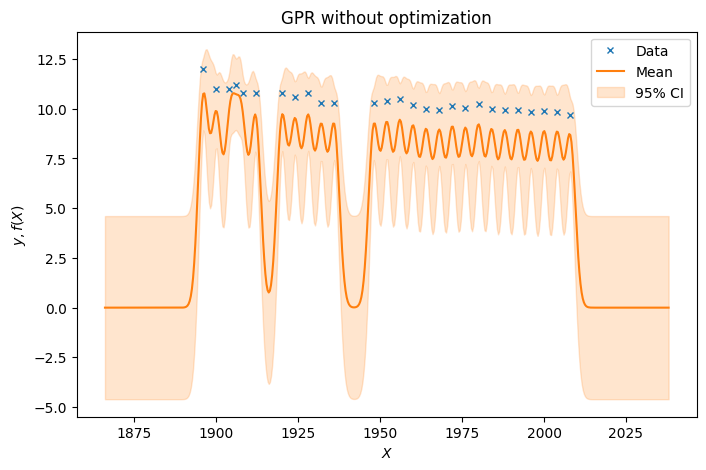

In [44]:
m1 = GPR(X, y, params)
m1.fit()
m1.predict(X_pred)

visualise(m1, title="GPR without optimization")

In [45]:
m1.optimize()

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 311.76628282344495
        x: [ 1.318e+05  1.347e+05 -4.718e+04]
      nit: 11
      jac: [ 0.000e+00  2.271e-05 -5.913e-04]
     nfev: 80
     njev: 20
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>


<ipython-input-2-dcb925078c5b>:38: RuntimeWarning: invalid value encountered in log
  return np.log(x)


<ipython-input-43-a84e498a8b13>:13: RuntimeWarning: invalid value encountered in sqrt
  model.mean_pred - 2*np.sqrt(model.var_pred),
<ipython-input-43-a84e498a8b13>:14: RuntimeWarning: invalid value encountered in sqrt
  model.mean_pred + 2*np.sqrt(model.var_pred),


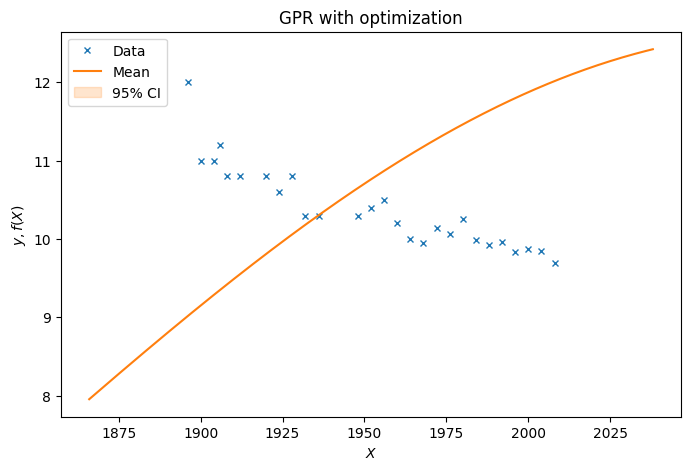

In [46]:
m1.predict(X_pred)
visualise(m1, title="GPR with optimization")

## 2.2 スパースガウス過程回帰

最適化のための目的関数を ELBO で実装しようと試みたが、どうしても上手く行かず、自分ではもう原因がわからないため、負の対数周辺尤度を用いたものも一緒に実装した。

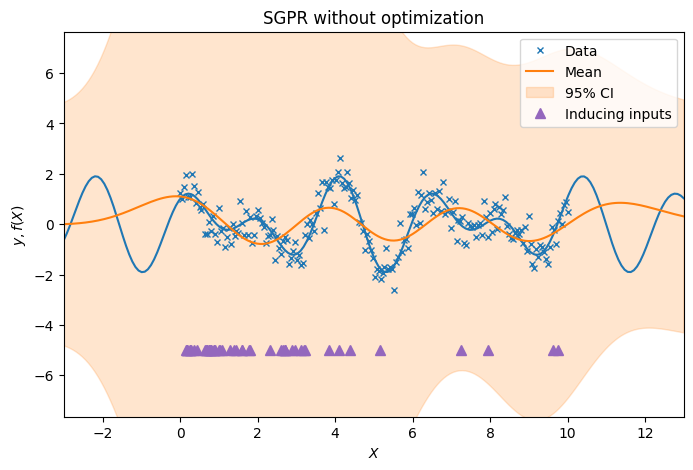

In [ ]:
m2 = SparseGPR(X, y, Z, params)
m2.fit()
m2.predict(X_pred)

visualise(m2, title="SGPR without optimization")

In [ ]:
m2.optimize()

  message: CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
  success: True
   status: 0
      fun: -1159.4972175955363
        x: [ 1.000e-20  2.010e+01 ...  1.444e-01  8.642e+00]
      nit: 13
      jac: [ 3.176e+13  0.000e+00 ...  0.000e+00  0.000e+00]
     nfev: 1728
     njev: 32
 hess_inv: <53x53 LbfgsInvHessProduct with dtype=float64>


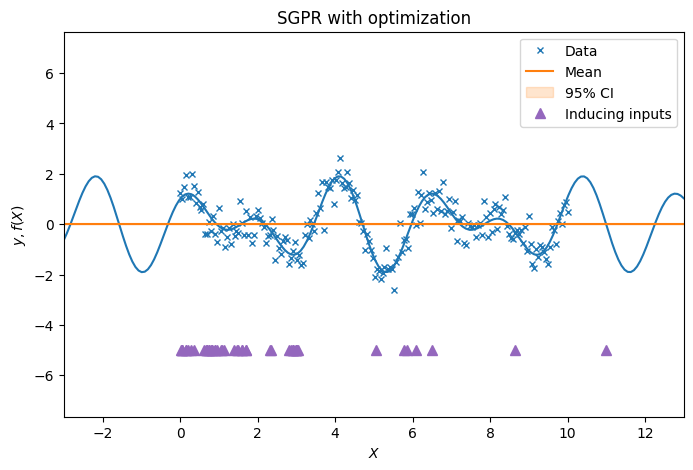

In [ ]:
m2.predict(X_pred)
visualise(m2, title='SGPR with optimization')

## 2.3 Naive implementation

In [ ]:
class GPR:
    def __init__(self, X, y, params, jitter_value=1e-6):
        self.X = X.astype(float)
        self.y = y.astype(float)
        self.X_pred = None
        self.kernel_func = self._rbf_kernel
        self.initial_params = params
        self.params = params
        self.jitter_value = jitter_value
        self.N = len(X)
        self.K = None
        self.K_inv = None
        self.mean_pred = None
        self.var_pred = None

    def _jitter(self, n):
        return np.eye(n) * self.jitter_value

    def _cholesky_decomposition(self, matrix):
        while True:
            try:
                L = np.linalg.cholesky(matrix)
                return L
            except np.linalg.LinAlgError:
                matrix += self._jitter(len(matrix))

    def _inverse_matrix(self, matrix):
        try:
            matrix_inv = np.linalg.inv(matrix)
            return matrix_inv
        except:
            matrix += self._jitter(matrix.shape[0])
            matrix_inv = np.linalg.inv(matrix)
            return matrix_inv

    def _log(self, x):
        x += self.jitter_value
        return np.log(x)

    def _determinant(self, matrix):
        matrix += self._jitter(matrix.shape[0])
        return np.linalg.det(matrix)

    def _rbf_kernel(self, x1, x2, theta1, theta2):
        return theta1 * np.exp(- (x1 - x2)**2 / theta2)

    def _compute_kernel_matrix(self, x1, x2, params):
        tmp1, tmp2 = x1, x2
        n1, n2 = len(x1), len(x2)
        x1, x2 = x1.reshape(n1,1), x2.reshape(1,n2)
        x1, x2 = np.tile(x1, (1, n2)), np.tile(x2, (n1, 1))
        K = self.kernel_func(x1, x2, params[0], params[1])
        if np.array_equal(tmp1, tmp2):
            K += params[2] * np.eye(n1)
        return K

    def fit(self):
        self.K = self._compute_kernel_matrix(self.X, self.X, self.params)
        self.K_noise = self.K + self.params[2] * np.eye(self.K.shape[0])
        self.K_noise_inv = self._inverse_matrix(self.K_noise)

    def predict(self, X_pred):
        self.X_pred = X_pred.astype(float)

        K_star_n = self._compute_kernel_matrix(X_pred, self.X, self.params)
        self.mean_pred = K_star_n @ self.K_noise_inv @ self.y
        K_star_star = self._compute_kernel_matrix(X_pred, X_pred, self.params)
        cov_pred = K_star_star - K_star_n @ self.K_noise_inv @ K_star_n.T
        self.var_pred = np.diag(cov_pred)

    def _objective_func(self, params):
        K = self._compute_kernel_matrix(self.X, self.X, params)
        K_noise = K + params[2] * np.eye(K.shape[0])
        K_noise_inv = self._inverse_matrix(K_noise)
        K_noise_det = self._determinant(K_noise)
        func = self._log(K_noise_det) + self.y.T @ K_noise_inv @ self.y
        return func

    def optimize(self):
        bounds = [(1e-6, None), (1e-6, None), (1e-6, None)]
        initial_values = self.params
        result = scipy.optimize.minimize(self._objective_func,
                                         initial_values,
                                         method='L-BFGS-B')
        self.params = list(result.x)
        self.fit()
        print(result)

In [ ]:
class SparseGPR2(GPR):
    def __init__(self, X, y, Z, params, jitter_value=1e-6):
        super().__init__(X, y, params, jitter_value)

        self.Z = Z.astype(float)

        self.params_for_opt = params + list(Z)

        self.K_mm_inv = None
        self.K_mn = None
        self.K_nn_diag = None
        self.Lambda = None
        self.L_sigma_inv = None
        self.Q_mm = None
        self.Q_mm_inv = None
        self.u_hat = None

    def _compute_kernel_matrix_diag(self, x, params):
        n = len(x)
        K_diag = np.zeros((n,n))
        for i in range(n):
            K_diag[i,i] = self.kernel_func(x[i], x[i], params[0], params[1])
        return K_diag

    def fit(self):
        K_mm = self._compute_kernel_matrix(self.Z, self.Z, self.params)
        self.K_mm_inv = self._inverse_matrix(K_mm)
        self.K_mn = self._compute_kernel_matrix(self.Z, self.X, self.params)

        K_nn_diag = self._compute_kernel_matrix_diag(self.X, self.params)
        self.Lambda = np.zeros((self.N, self.N))
        for i in range(self.N):
            self.Lambda[i,i] = K_nn_diag[i,i] - self.K_mn[:,i].T @ self.K_mm_inv @ self.K_mn[:,i]

        L_sigma_inv = self._inverse_matrix(self.Lambda + self.params[2]*np.eye(self.N))
        Q_mm = K_mm + self.K_mn @ L_sigma_inv @ self.K_mn.T
        self.Q_mm_inv = self._inverse_matrix(Q_mm)
        self.u_hat = K_mm @ self.Q_mm_inv @ self.K_mn @ L_sigma_inv @ self.y

    def predict(self, X_pred):
        self.X_pred = X_pred.astype(float)

        K_m_star = self._compute_kernel_matrix(self.Z, X_pred, self.params)
        K_star_star = self._compute_kernel_matrix(X_pred, X_pred, self.params)

        Lambda_star = np.zeros((len(X_pred), len(X_pred)))
        for i in range(len(K_star_star)):
            Lambda_star[i,i] = K_star_star[i,i] - K_m_star[:,i].T @ self.K_mm_inv @ K_m_star[:,i]

        mean_pred = K_m_star.T @ self.K_mm_inv @ self.u_hat
        cov_pred = Lambda_star + K_m_star.T @ self.K_mm_inv @ K_m_star + self.params[2] * np.eye(Lambda_star.shape[0])

        self.mean_pred = mean_pred
        self.var_pred = np.diag(cov_pred)

    def _objective_func(self, params_for_opt):
        params = params_for_opt[0:len(self.params)]
        Z = np.array(params_for_opt[len(self.params):])
        K_mm = self._compute_kernel_matrix(Z, Z, params_for_opt[0:len(self.params)])
        K_mm_inv = self._inverse_matrix(K_mm)
        K_mn = self._compute_kernel_matrix(Z, self.X, params)
        K_nn_diag = self._compute_kernel_matrix_diag(self.X, params)

        Lambda = np.zeros((self.N, self.N))
        for i in range(self.N):
            Lambda[i,i] = K_nn_diag[i,i] - K_mn[:,i].T @ K_mm_inv @ K_mn[:,i]

        K_params = K_mn.T @ K_mm_inv @ K_mn + Lambda + params[2] * np.eye(self.N)
        K_params_inv = self._inverse_matrix(K_params)

        log_likelihood = - self._log(self._determinant(K_params) + 1e-3) - self.y.T @ K_params_inv @ self.y

        return -float(log_likelihood)

    def optimize(self):
        bounds = [(1e-6, None), (1e-6, None), (1e-6, None)]
        for i in range(len(self.Z)):
            bounds.append((0, 10))
        initial_values = self.params_for_opt
        result = scipy.optimize.minimize(self._objective_func,
                                         initial_values,
                                         method='L-BFGS-B',
                                         bounds=bounds)
        self.params = list(result.x)[0:len(self.params)]
        self.Z = np.array(list(result.x)[len(self.params):])
        self.fit()

        print(result)

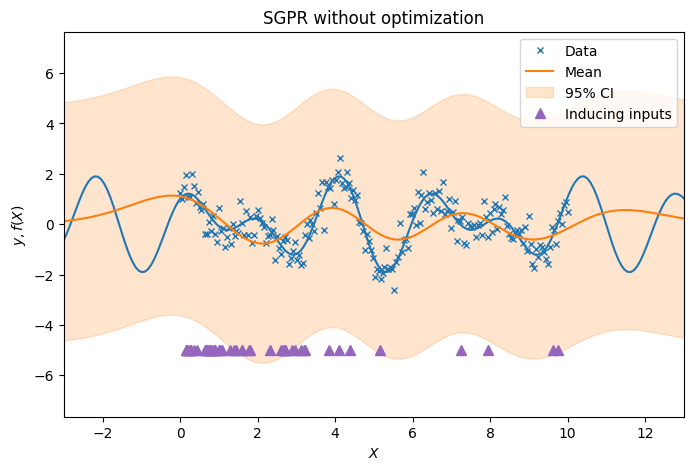

In [ ]:
m3 = SparseGPR2(X, y, Z, params)
m3.fit()
m3.predict(X_pred)

visualise(m3, title="SGPR without optimization")

In [ ]:
m3.optimize()

  message: STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT
  success: False
   status: 1
      fun: 52.69893280081012
        x: [ 2.018e+00  3.006e-01 ...  3.756e-01  5.161e+00]
      nit: 212
      jac: [ 7.754e-02 -2.302e-01 ...  7.819e-03  5.131e-02]
     nfev: 15012
     njev: 278
 hess_inv: <53x53 LbfgsInvHessProduct with dtype=float64>


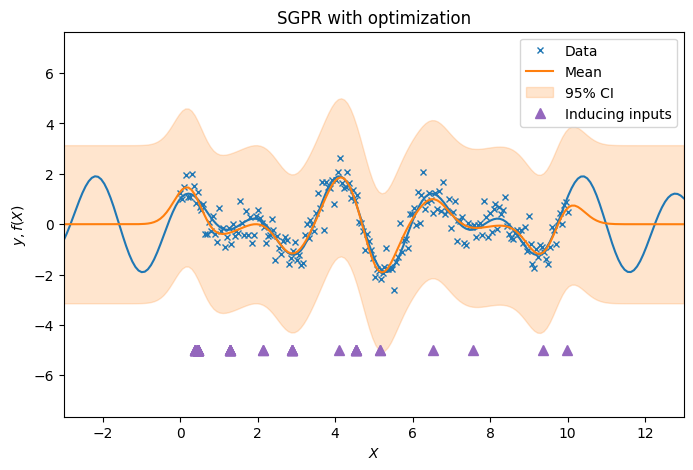

In [ ]:
m3.predict(X_pred)

visualise(m3, title="SGPR with optimization")